<a href="https://colab.research.google.com/github/topguns837/Tensorflow-deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Shape of input tensor
# = [batch_size,height,width,3(R,G,B)]

# Shape of of output tensor
# = [No of classes] 

### Intrduction to neural network classification with Tensorflow :
1) Binary Classification

2) Multiclass Classification

3) Multilabel Classification



In [2]:
# Creating our own data to view and fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles

X,y = make_circles(n_samples,noise = 0.03, random_state = 42)

In [4]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# Visualize , visualize and visualize

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [10]:
X = circles.drop(["label"],axis = 1)
y = circles["label"]

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

TypeError: ignored

In [12]:
# We will use a Binary Classification model here

### Input and Output shapes

In [13]:
X.shape

(1000, 2)

In [14]:
y.shape

(1000,)

In [15]:
# How many samples are we wokring with ?
len(X),len(y)

(1000, 1000)

### Steps in Modelling

In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
X_train


,X0,X1
187,-0.129264,-1.053172
126,0.415276,0.633248
573,0.763464,0.625101
184,-0.348798,-0.714871
124,-1.017960,0.200975
...,...,...
334,1.015731,-0.022047
175,-0.149486,-0.985953
34,-0.089516,-1.067768
626,0.856067,0.549943


In [18]:
X_train.shape,y_train.shape


((800, 2), (800,))

In [19]:
X_test.shape,y_test.shape


((200, 2), (200,))

In [20]:
X_train

,X0,X1
187,-0.129264,-1.053172
126,0.415276,0.633248
573,0.763464,0.625101
184,-0.348798,-0.714871
124,-1.017960,0.200975
...,...,...
334,1.015731,-0.022047
175,-0.149486,-0.985953
34,-0.089516,-1.067768
626,0.856067,0.549943


In [21]:
X_test

,X0,X1
144,0.163891,-0.797589
426,0.490081,0.850842
371,-0.667923,0.428615
136,0.053780,0.973883
484,0.706895,0.318268
...,...,...
764,0.137280,0.737127
389,-0.792887,-0.225118
507,0.075153,-1.022636
909,1.000475,-0.311885


In [22]:
import tensorflow as tf

In [23]:
# No need to scale
import numpy as np
np.median(X_train),np.mean(X_train)



(-0.031221576151497288, X0    0.007721
 X1   -0.035840
 dtype: float64)

### Model Creation

In [26]:
# Random seed
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

history = model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 2.8032 - accuracy: 0.4538
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7609 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.5038
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4975
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4938
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5125
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5113
Epoch 11/

In [27]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.4750


[0.6959890127182007, 0.4749999940395355]

In [47]:
# Using more neurons in the first layer and adding another layer

# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(10,activation="relu"),
                               tf.keras.layers.Dense(1,activation="softmax")

                               
])

#2. Compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_1.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5025
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5025
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5025
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5025
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5025
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5025
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5025
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5025
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5025
Epoch 11/

### Improve our model :)

In [42]:
# To visualize our model's predictions, let's create a function : 'plot_decision_boundary'

#1. Take a trained model, features(X) and labels(y)
#2. Create a meshgrid of the different X values
#3. Make predictions across the meshgrid
#4. Make predictions

In [52]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
  y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

doing binary classifcation...


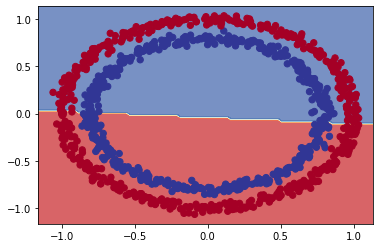

In [55]:
# Check out the model predictions
plot_decision_boundary(model,X=X,y=y)

In [59]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

# Split our dataset

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


# Fit our model to the regression model
model_1.fit(X_reg_train,y_reg_train,epochs = 100)


Epoch 1/100


ValueError: ignored

In [60]:
# Since we used BinaryCrossentropy as our loss fn, we are getting this error

In [66]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

                               
])

#2. Compile the model

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_reg_train,axis = -1),y_reg_train,epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

In [67]:
# Make predictions with our trained model

y_reg_preds = model_2.predict(X_reg_test)

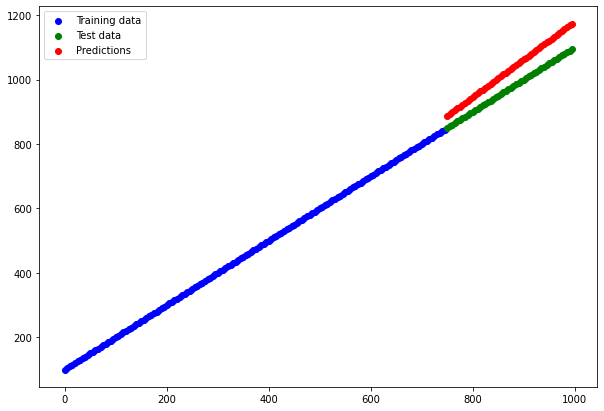

In [70]:
# Plot the data

plt.figure(figsize = (10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label = "Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label = "Test data")
plt.scatter(X_reg_test , y_reg_preds,c="r",label = "Predictions")
plt.legend()

### The missing piece is non-linearity